In [118]:
import sys
# load standard python modules
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# load custom modules required for jetCLR training
from modules.jet_augs import translate_jets, rotate_jets, rescale_pts, distort_jets, collinear_fill_jets, crop_jets
from modules.perf_eval import get_perf_stats, linear_classifier_test, plot_losses


# Load in the processed data

In [119]:
path_to_save_dir = "/global/home/users/rrmastandrea/training_data/"


save_id_dir = "n_sig_6557_n_bkg_8000_n_nonzero_20_n_pad_30/"

grading = 50

path_to_data = path_to_save_dir+save_id_dir
print(path_to_data)


clr_train = np.load(path_to_data+"clr_train.npy")
clr_val = np.load(path_to_data+"clr_val.npy")
data_train = np.load(path_to_data+"data_train.npy")
labels_train = np.load(path_to_data+"labels_train.npy")
data_val = np.load(path_to_data+"data_val.npy")
labels_val = np.load(path_to_data+"labels_val.npy")
data_test_f = np.load(path_to_data+"data_test_f.npy")
labels_test_f = np.load(path_to_data+"labels_test_f.npy")

# print data dimensions
print( "CLR training data shape: " + str( clr_train.shape ), flush=True)
print( "CLR val data shape: " + str( clr_val.shape ), flush=True)
print( "BC training data shape: " + str( data_train.shape ), flush=True)
print( "BC training labels shape: " + str( labels_train.shape ), flush=True)
print( "BC val data shape: " + str( data_val.shape ), flush=True)
print( "BC val labels shape: " + str( labels_val.shape ), flush=True)
print( "BC test data shape: " + str( data_test_f.shape ), flush=True)
print( "BC test labels shape: " + str( labels_test_f.shape ), flush=True)


# Plot num constituents

def get_num_constits(dataset):
    consits_list = []
    for collision in dataset:
        pts = collision[0,:]

        pads = np.where(pts==0)
        consits_list.append(dataset.shape[2]-len(pads[0]))
        
    return consits_list
        

/global/home/users/rrmastandrea/training_data/n_sig_6557_n_bkg_8000_n_nonzero_20_n_pad_30/
CLR training data shape: (11645, 3, 50)
CLR val data shape: (2912, 3, 50)
BC training data shape: (10189, 3, 50)
BC training labels shape: (10189,)
BC val data shape: (2184, 3, 50)
BC val labels shape: (2184,)
BC test data shape: (2184, 3, 50)
BC test labels shape: (2184,)


# Plot the jet constituents

(3, 50)


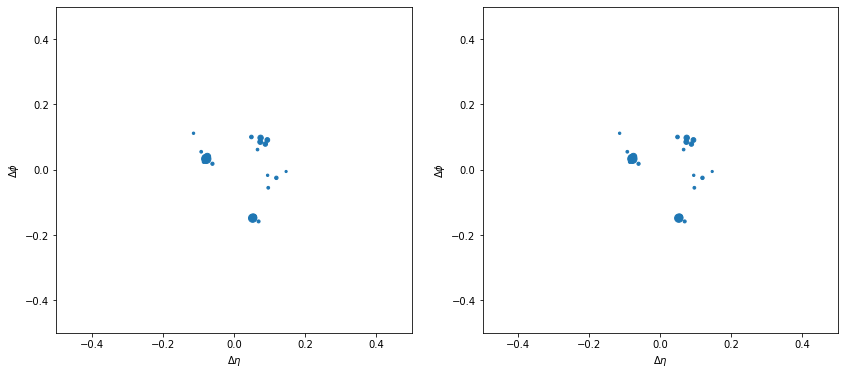

In [124]:
jet_to_plot = clr_train[2]
print(jet_to_plot.shape)

def plot_jet(jet1, jet2, xlims=(-.5,.5), ylims=(-.5,.5)):
    
    """ 
    # plotting pt
    fig, ax = plt.subplots(1,2, figsize = (10,4))
    ax[0].hist(jet1[0,:])
    ax[0].set_xlabel("Rescaled pT")
    ax[1].hist(jet2[0,:])
    ax[1].set_xlabel("Rescaled pT")
    fig.show()"""
    
    s = 85
    
    # plotting the eta-phi plane
    fig, ax = plt.subplots(1,2, figsize = (14,6))
    ax[0].scatter(jet1[1,:][::-1], jet1[2,:][::-1], s=s*jet1[0,:][::-1])
    ax[0].set_xlabel("$\Delta\eta$")
    ax[0].set_ylabel("$\Delta\phi$")
    ax[0].set_xlim(xlims)
    ax[0].set_ylim(ylims)
    
    ax[1].scatter(jet2[1,:][::-1], jet2[2,:][::-1],s=s*jet2[0,:][::-1])
    ax[1].set_xlabel("$\Delta\eta$")
    ax[1].set_ylabel("$\Delta\phi$")
    ax[1].set_xlim(xlims)
    ax[1].set_ylim(ylims)
    
    fig.show()

    
plot_jet(jet_to_plot, jet_to_plot)   


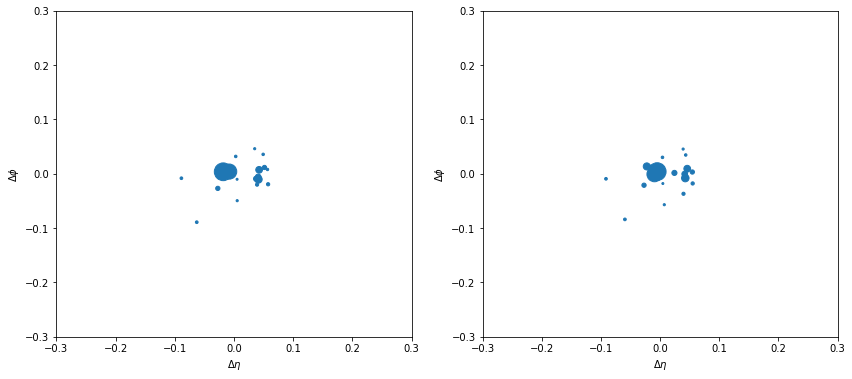

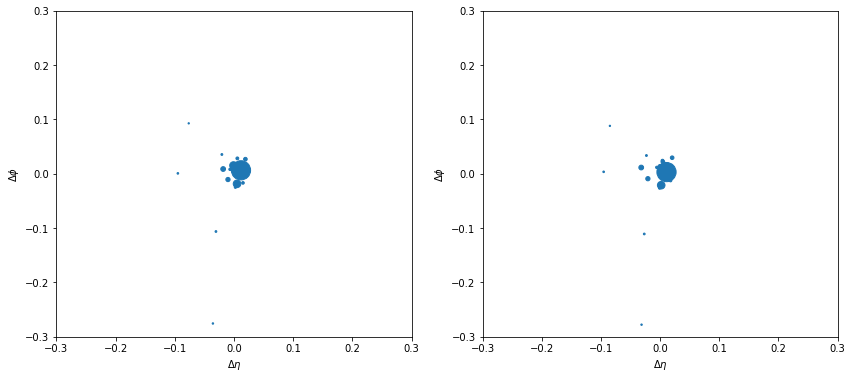

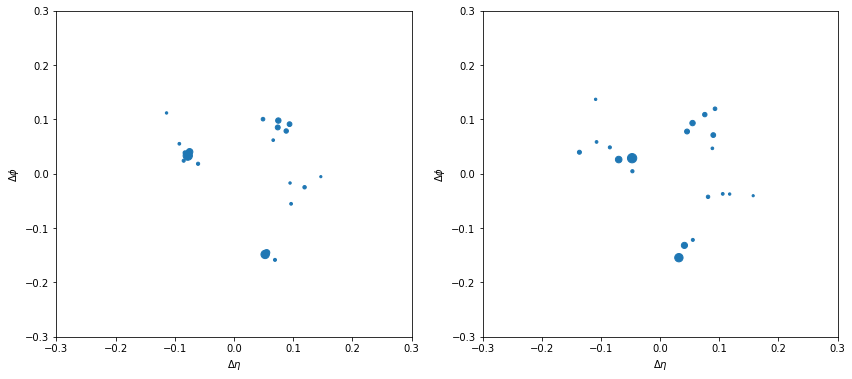

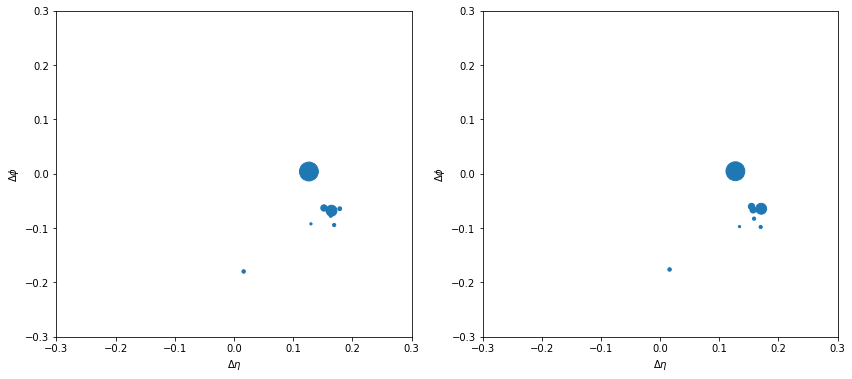

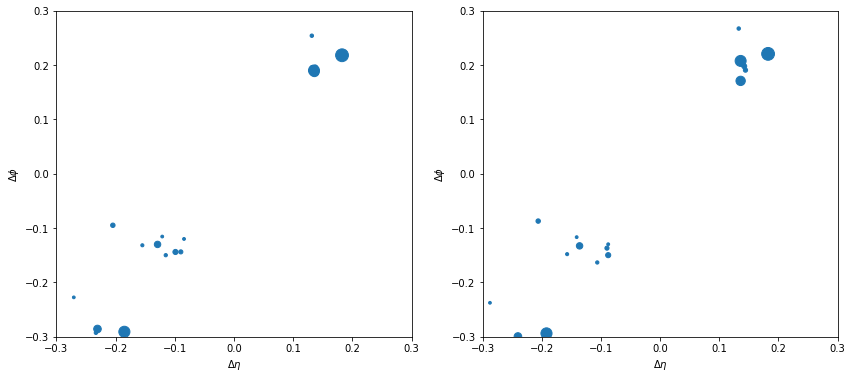

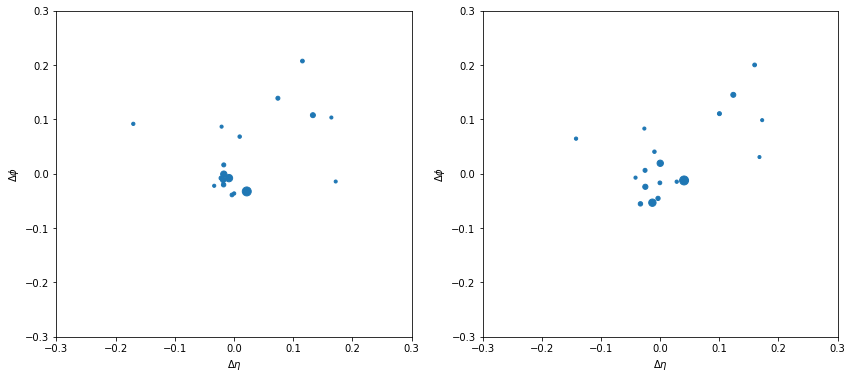

In [129]:
# Apply the transformations

range_to_transform = (0,6)





rot = False
trs = False
trsw = 1.0
dis = True
ptst = 0.1
col = False


xlims=(-.3,.3)
ylims=(-.3,.3)


           
for index_to_plot in range(6):
    
    orig_jet = clr_train[range_to_transform[0]:range_to_transform[1],:,:]
    aug_jet = orig_jet.copy()
    
    max_pt = np.max(orig_jet[index_to_plot][0])
    ptcm = 5*max_pt
    
    if rot:
        aug_jet = rotate_jets( aug_jet )
    if trs:
        aug_jet = translate_jets( aug_jet, width=trsw )
    if dis:
        aug_jet = distort_jets( aug_jet, strength=ptst, pT_clip_min=ptcm )
    if col:
        aug_jet = collinear_fill_jets( aug_jet )
        aug_jet = collinear_fill_jets( aug_jet )



    
    plot_jet(orig_jet[index_to_plot], aug_jet[index_to_plot], xlims, ylims)